# 13.5.2 Penalización de pesos

**Weight decay:** $\;$ es usual emplear estimación MAP con priors Gaussianos para pesos, $\,\mathcal{N}(\boldsymbol{w}\mid\boldsymbol{0},\alpha^2\mathbf{I})\,$, y sesgos, $\,\mathcal{N}(\boldsymbol{b}\mid\boldsymbol{0},\beta^2\mathbf{I})$

**Ejemplo:** $\;$ MNIST con terminación temprana (paciencia 2) y regularización L2 ($\alpha^2=\beta^2=10^{-3}$)

In [5]:
import numpy as np; import matplotlib.pyplot as plt
import tensorflow as tf; from tensorflow import keras; import tensorflow_datasets as tfds
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=True)
def normalize_img(image, label): return tf.cast(image, tf.float32) / 255., label
X_train = ds_train.map(normalize_img).batch(128)
X_test = ds_test.map(normalize_img).batch(128)
L2_reg = keras.regularizers.L2(1e-3)
L0 = keras.layers.Flatten(input_shape=(28, 28))
L1 = keras.layers.Dense(128, activation='relu', kernel_regularizer=L2_reg, bias_regularizer=L2_reg)
L2 = keras.layers.Dense(10, kernel_regularizer=L2_reg, bias_regularizer=L2_reg)
M = keras.models.Sequential([L0, L1, L2])
optimizer = tf.keras.optimizers.Adam(0.001)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [keras.metrics.SparseCategoricalAccuracy()]
M.compile(optimizer=optimizer, loss=loss, metrics=metrics)
EarlyStopping_cb = keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=2)
H = M.fit(X_train, epochs=100, validation_data=X_test, verbose=0, callbacks=[EarlyStopping_cb])

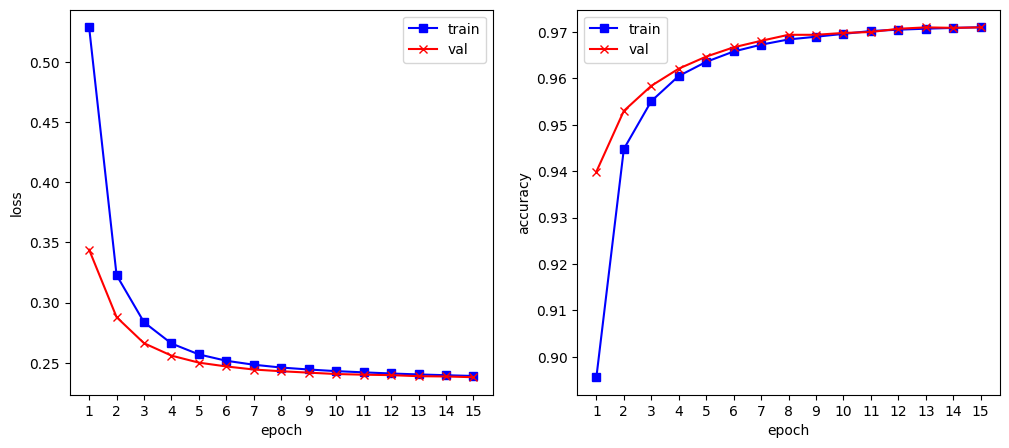

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]; ax.set_xlabel('epoch'); ax.set_ylabel('loss'); ax.set_xticks(xx)
ax.plot(xx, H.history['loss'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_loss'], color='r', marker='x', label='val'); ax.legend();
ax = axes[1]; ax.set_xlabel('epoch'); ax.set_ylabel('accuracy'); ax.set_xticks(xx)
ax.plot(xx, H.history['sparse_categorical_accuracy'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_sparse_categorical_accuracy'], color='r', marker='x', label='val'); ax.legend();